In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df1 = pd.read_csv('data.csv')
df1.head()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,64.13,2058.81,2.53,1307.94,5815.68,21.06,4.1099,0.7434,0.4052
1,68.21,1883.68,2.73,610.06,6343.57,9.71,0.9330,0.7421,0.4044
2,45.27,948.74,3.90,480.06,6251.32,23.71,4.1899,0.7915,0.3997
3,66.97,2036.34,15.26,700.38,7795.69,61.04,1.6463,0.9139,0.3991
4,67.21,1340.54,10.36,1209.46,123.96,20.47,2.1917,0.8877,0.3980


In [3]:
X = df1.iloc[:,1:7].values
y = df1.iloc[:,8].values
X = StandardScaler().fit_transform(X)

In [4]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
pre_process = PolynomialFeatures(degree=3)

# Transform our x input to 1, x and x^2
X_poly = pre_process.fit_transform(X)
# Show the transformation on the notebook
X_poly

array([[ 1.        ,  1.10367146, -1.03139791, ...,  0.84286464,
        -1.4364521 ,  2.44807355],
       [ 1.        ,  0.77149069, -0.99128895, ..., -2.77580895,
        -4.14129935, -6.1785089 ],
       [ 1.        , -1.00187251, -0.7566515 , ...,  0.67645419,
        -1.40333883,  2.9112982 ],
       ...,
       [ 1.        ,  1.53622914, -1.23795908, ...,  1.68507618,
        -1.28566228,  0.98092152],
       [ 1.        ,  0.37392836, -0.85291302, ...,  0.52880789,
        -0.77257699,  1.12871843],
       [ 1.        ,  1.22553873, -0.93313095, ...,  0.37714691,
         0.17526859,  0.08145123]])

In [5]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)

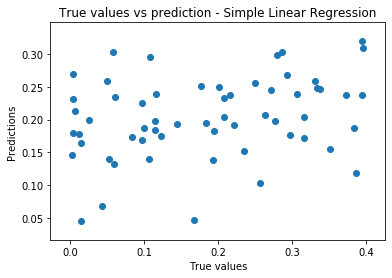

In [8]:
#To make predictions on the test data
plt.title('True values vs prediction - Simple Linear Regression')
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [9]:
print("Score:", model.score(X_test, y_test))
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score: 0.020772111598175158
Mean Absolute Error: 0.10165790465881518
Mean Squared Error: 0.015202093460697333
Root Mean Squared Error: 0.12329676987130414


In [10]:
df2 = pd.read_csv('fake_data2.csv')
df2.head()

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.
0,53.3549,1105.1310,12.8663,1378.9315,2812.6157,75.6442,3.3628,0.7205
1,72.2534,1026.3148,3.4239,1028.7463,919.9169,44.2063,3.8679,0.8940
2,65.0794,722.9642,6.2303,2017.9195,1212.4212,17.5518,2.3552,0.7661
3,60.7060,1557.2321,11.7114,558.2210,1716.0908,65.7869,1.7253,0.7738
4,46.1874,1304.4192,8.5750,1280.4693,1929.2197,37.4468,1.8327,0.7611


In [11]:
X2 = df2.iloc[:,1:7]
X2.head()
X2 = X2.values
X2 = StandardScaler().fit_transform(X2)
X2_poly = pre_process.fit_transform(X2)

In [12]:
df2['CR-corrosion defect']= model.predict(X2_poly)


In [13]:
df2

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,53.3549,1105.1310,12.8663,1378.9315,2812.6157,75.6442,3.3628,0.7205,0.121023
1,72.2534,1026.3148,3.4239,1028.7463,919.9169,44.2063,3.8679,0.8940,0.134942
2,65.0794,722.9642,6.2303,2017.9195,1212.4212,17.5518,2.3552,0.7661,0.325076
3,60.7060,1557.2321,11.7114,558.2210,1716.0908,65.7869,1.7253,0.7738,0.261268
4,46.1874,1304.4192,8.5750,1280.4693,1929.2197,37.4468,1.8327,0.7611,0.213843
...,...,...,...,...,...,...,...,...,...
9995,69.2011,2079.2813,16.7139,1605.8382,5812.9489,86.2421,2.8301,0.7822,0.375295
9996,70.5083,472.6720,13.1748,1626.3832,2138.2500,33.3969,4.1051,0.7938,0.009110
9997,72.1220,969.7821,0.5668,657.2762,6986.5283,27.2857,4.0120,0.7954,0.222506
9998,54.1076,1239.9707,7.1714,979.8507,4872.2828,36.4382,1.4042,0.7397,0.249141


In [14]:
df2.to_csv('fake_data_predicted.csv')